In [3]:
#########################################################################################
# Name: Hasan Şenyurt
# Student ID: 64180008
# Department: Computer Engineering
# Assignment ID: A4
#########################################################################################

# Question 1

**Q1.a: Write a Python program to draw line charts of the financial data of BIST 100 index
between May 05, 20202 to May 15, 2020 using price:**

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

bist = {"Date":["May 15, 2020","May 14, 2020","May 13, 2020","May 12, 2020","May 11, 2020","May 08, 2020","May 07, 2020","May 06, 2020","May 05, 2020",],
        "Price":[99768.15,99193.03,100159.13,99615.88,97792.23,97845.20,97845.20,98571.46,98737.52],
        "Open":[99678.32,100007.88,99705.13,97926.43,98419.82,98902.63,98579.92,98886.10,99634.33],
        "High":[100812.52,100381.19,100864.92,99708.31,98641.05,99514.39,99273.48,99280.05,99791.34],
        "Low":[99678.32,98494.25,99442.90,97740.33,97792.23,97671.82,97799.59,98069.46,97880.46],
        "Vol":["1.88B","2.33B","2.39B","2.54B","2.09B","2.60B","2.39B","2.28B","2.04B"],
        "Change %":["0.58%","-0.96%","0.55%","1.86%","-0.05%","-0.56%","-0.18%","-0.17%","-0.11%"]
}
bist_100 = pd.DataFrame(bist)

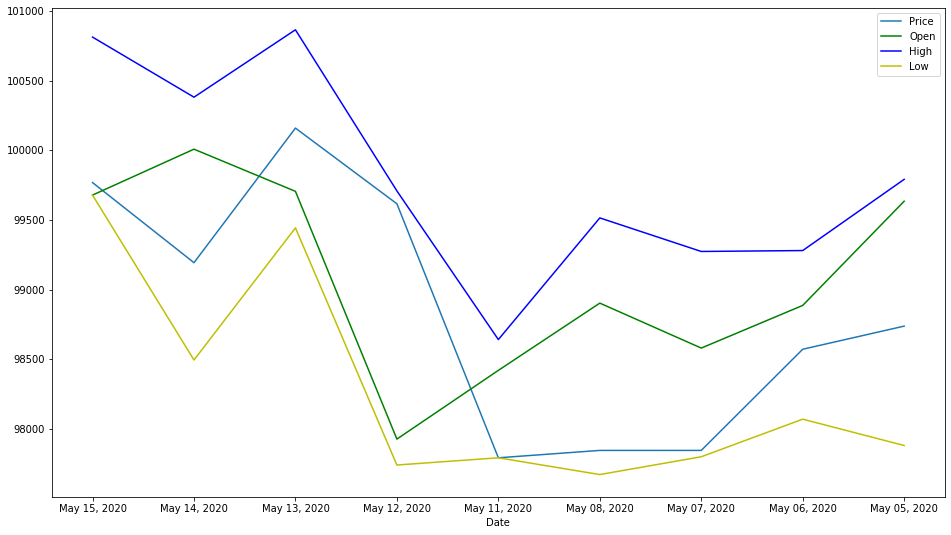

In [5]:
plt.figure(figsize=(16, 9))
plt.plot(bist_100.Date,bist_100.Price)
plt.plot(bist_100.Date,bist_100.Open,c="g")
plt.plot(bist_100.Date,bist_100.High,c="b")
plt.plot(bist_100.Date,bist_100.Low,c="y")
plt.xlabel('Date')
plt.legend(["Price","Open","High","Low"])
plt.show() # Numbers of these terms are so close, so i ploted in one graph.

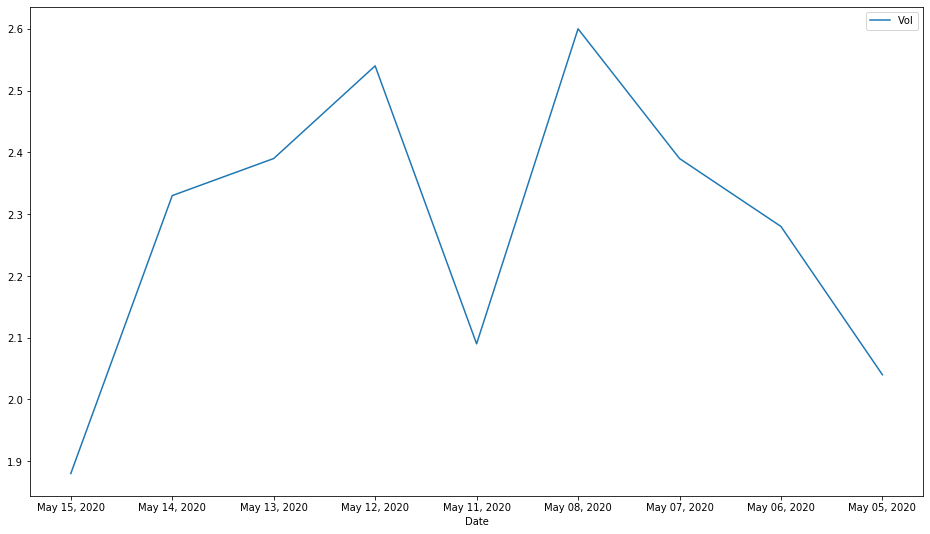

In [6]:
new_vol = []
for i in bist_100.Vol:
    new_vol.append(float(i[:-1]))

plt.figure(figsize=(16, 9))
plt.plot(bist_100.Date,new_vol)
plt.xlabel('Date')
plt.legend(["Vol"])
plt.show()

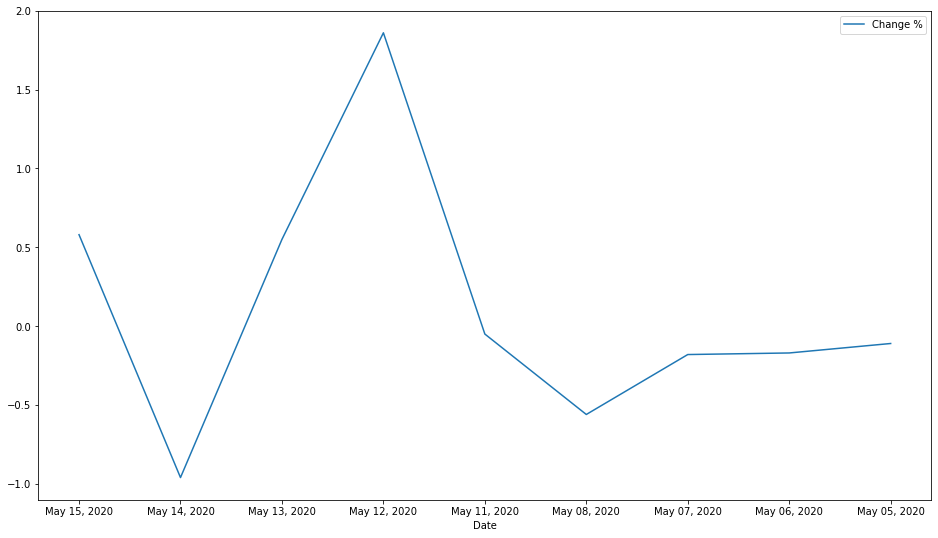

In [7]:
new_change = []
for i in bist_100["Change %"]:
    new_change.append(float(i[:-1]))

plt.figure(figsize=(16, 9))
plt.plot(bist_100.Date,new_change)
plt.xlabel('Date')
plt.legend(["Change %"])
plt.show()

**Q1.b: Write a Python programming to display a bar chart of stock prices using the following
sample data.**

In [8]:
data = {"Stocks":["ASELS", "BIMAS", "GARAN", "ALKIM","SASA","THYAO"],
        "Popularity":[28.86, 56.50, 7.70, 14.20, 10.14, 10.58]
}
sample_data = pd.DataFrame(data)

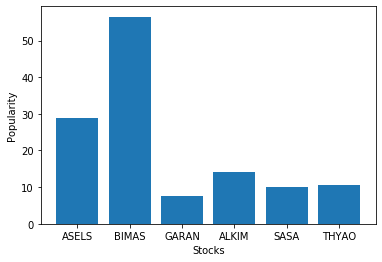

In [9]:
plt.bar(sample_data.Stocks,sample_data.Popularity)
plt.xlabel('Stocks')
plt.ylabel('Popularity')
plt.show()

# Question 2 

**Q2.a: Create a script that reads Pride and Prejudice from a text file. Produce statistics
about the book, including the total word count, the total character count, the
average word length, the average sentence length, a word distribution
containing frequency counts of all words, and the top 10 longest words. In the
“Natural Language Processing (NLP)” chapter, you’ll find lots of more
sophisticated techniques for analyzing and comparing such texts.**

In [10]:
from textblob import TextBlob
from pathlib import Path
import nltk
from operator import itemgetter

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YUSUFSENYURT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
#Stopwords and not words defined in 'stops' list to extract nonuseful words and characters.
stops = stopwords.words('english')
stops.append("“")
stops.append("”")
stops.append("’")
stops.append("‘") #extract these undesired terms.

In [13]:
file = open("Pride and Prejudice.txt","r",encoding='utf-8')
blob = TextBlob(file.read())
blob = blob[719:-18810] #I removed beginning and end part for e-book. Only contains book now(includes chapter part).

items = blob.word_counts.items()
items = [item for item in items if item[0] not in stops]

sorted_items = sorted(items, key=itemgetter(1), reverse=True)

    
char_total = 0
for i in blob:
    char_total += len(i)
    
top_10 = []

b = list(blob.words)
a = max(b,key = len)

for i in range(10):
    top_10.append(a)
    b.remove(a)
    a = max(b,key = len)
    
print("Total Word Count =",len(blob.words))
print("Total Character Count:",char_total)
print("Average Word Length:",char_total/len(blob.words))
print("Average Sentence Length:",char_total/len(blob.sentences))
print("All words:",sorted_items)
print("Top 10 words:",top_10) 


Total Word Count = 126779
Total Character Count: 756212
Average Word Length: 5.964804896710023
Average Sentence Length: 162.2772532188841
All words: [('mr', 783), ('elizabeth', 631), ('could', 524), ('would', 469), ('darcy', 417), ('said', 401), ('mrs', 343), ('much', 327), ('bennet', 323), ('must', 308), ('bingley', 306), ('jane', 288), ('miss', 283), ('one', 270), ('know', 238), ('though', 221), ('never', 220), ('soon', 216), ('sister', 216), ('well', 212), ('think', 211), ('time', 200), ('might', 200), ('every', 197), ('wickham', 193), ('may', 192), ('lady', 191), ('little', 189), ('good', 182), ('collins', 180), ('nothing', 176), ('without', 170), ('lydia', 169), ('make', 167), ('shall', 162), ('dear', 158), ('say', 158), ('family', 152), ('see', 149), ('man', 148), ('first', 145), ('great', 141), ('two', 135), ('father', 135), ('however', 134), ('day', 133), ('mother', 133), ('young', 130), ('ever', 130), ('made', 126), ('catherine', 126), ('give', 123), ('us', 123), ('chapter', 1

**Q2.b: A word cloud visualizes words, displaying more frequently occurring words in
larger fonts. In this exercise, you’ll create a word cloud that visualizes the top
200 words in Pride and Prejudice.**

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(colormap='prism',background_color='white')

blob1 = [word for word in blob.words.lower() if word not in stops]


frequencies = dict((i,blob1.count(i)) for i in blob1) # it takes 2-3 minutes to create dictionary.
wordcloud = wordcloud.fit_words(frequencies)
wordcloud = wordcloud.to_file('PrideAndPrejudice.png')
file.close()

# Question 3

**Q3.a: Web pages are excellent sources of text to use in NLP tasks. In the following
IPython session, you’ll use the requests library to download
the www.python.org home page’s content. This is called web scraping.
You’ll then use the Beautiful Soup library to extract only the text from the
page. Eliminate the stop words in the resulting text, then use
the wordcloud module to create a word cloud based on the text.**

In [15]:
import requests
from bs4 import BeautifulSoup

In [16]:
response = requests.get('https://www.python.org')
response.content
soup = BeautifulSoup(response.content,'html5lib') # I did same thing with Selim Hoca 
                                                  #but some undesired (html, while, if..) words exist in the text.
text = soup.get_text(strip = True)

In [17]:
text = TextBlob(text)

In [18]:
text1 = [word for word in text.words if word not in stops]

In [19]:
counts = dict((i,text1.count(i)) for i in text1)
wordcloud = wordcloud.fit_words(counts)
wordcloud = wordcloud.to_file('Python.png')

**Q3.b: Using the text from Exercise a, create a TextBlob, then tokenize it
into Sentences and Words, and extract its noun phrases.**

In [20]:
print("Sentences:",text.sentences)
print("\n**************************************************************************************************************\n")
print("Words:",text.words)
print("\n**************************************************************************************************************\n")
print("Noun Phrases:",text.noun_phrases)

Sentences: [Sentence("Welcome to Python.org{
       "@context": "https://schema.org",
       "@type": "WebSite",
       "url": "https://www.python.org/",
       "potentialAction": {
         "@type": "SearchAction",
         "target": "https://www.python.org/search/?q={search_term_string}",
         "query-input": "required name=search_term_string"
       }
     }var _gaq = _gaq || [];
    _gaq.push(['_setAccount', 'UA-39055973-1']);
    _gaq.push(['_trackPageview']);

    (function() {
        var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
        ga.src = ('https:' == document.location.protocol ?"), Sentence("'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';
        var s = document.getElementsByTagName('script')[0]; s.parentNode.insertBefore(ga, s);
    })();Notice:While Javascript is not essential for this website, your interaction with the content will be limited."), Sentence("Please turn Javascript on for the full experience.

Noun Phrases: ['welcome', 'python.org', '@ context', '@ type', 'website', '@ type', 'searchaction', 'q= {', '} } var _gaq = _gaq || [ ]', "[ '_setaccount", "[ '_trackpageview", '{ var ga = document.createelement', "ga.type = 'text/javascript", 'ga.async =', 'ga.src =', '== document.location.protocol', "+ '.google-analytics.com/ga.js", 'var s = document.getelementsbytagname', 'notice', 'javascript', 'please', 'javascript', 'full experience.skip', 'python networkdonate≡menusearch', 'sitegoaasmallerlargerresetsocializefacebooktwitterchat', 'ircaboutapplicationsquotesgetting startedhelppython brochuredownloadsall', 'releasessource codewindowsmac', 'os xother platformslicensealternative implementationsdocumentationdocsaudio/visual talksbeginner', 'guidedeveloper', 'guidefaqnon-english docspep indexpython bookspython essayscommunitycommunity surveydiversitymailing listsircforumspsf annual impact reportpython conferencesspecial interest groupspython logopython wikimerchandisecommunity awardsc

**Q3.c: Using the techniques in Exercise a, download a web page for a current news
article and create a TextBlob. Display the sentiment for the
entire TextBlob and for each Sentence.**

In [21]:
response = requests.get('https://www.bbc.com/news/world-europe-52806472')
response.content
soup = BeautifulSoup(response.content,'html5lib')# I did same thing with Selim Hoca 
                                                  #but some undesired (html, while, if..) words exist in the text.
text = soup.get_text(strip = True)

In [22]:
text1 = TextBlob(text)

In [23]:
print("All text:",text1.sentiment)
print()
for i in text1.sentences:
    print(i.sentiment)

All text: Sentiment(polarity=-0.34606009259024256, subjectivity=0.7221372309873265)

Sentiment(polarity=-0.7875, subjectivity=1.0)
Sentiment(polarity=0.16562499999999997, subjectivity=0.6333333333333333)
Sentiment(polarity=0.15000000000000002, subjectivity=0.354)
Sentiment(polarity=0.24642857142857144, subjectivity=0.275)
Sentiment(polarity=-0.005782312925170065, subjectivity=0.4666666666666667)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.5119047619047619)
Sentiment(polarity=0.26743970315398885, subjectivity=0.47717996289424863)
Sentiment(polarity=-0.12, subjectivity=0.1)
Sentiment(polarity=0.2901785714285714, subjectivity=0.5749007936507936)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22499999999999998, subjectivity=0.5375000000000001)
Sentiment(polarity=-0.14166666666666666, subjectivity=0.25833333333333336)
Sentiment(polarity=-0.2833333333333333, subjectivity=0.5499999999999999)
Sentiment(polarity=0.1875, subje

**Q3.d: Repeat the previous exercise but use the NaiveBayesAnalyzer for
sentiment analysis.**

In [24]:
from textblob.sentiments import NaiveBayesAnalyzer

In [25]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
print("All text:",blob.sentiment)
print()
for i in blob.sentences:
    print(i.sentiment)

All text: Sentiment(classification='pos', p_pos=1.0, p_neg=3.5930576348054447e-56)

Sentiment(classification='pos', p_pos=0.9899887055500897, p_neg=0.010011294449903623)
Sentiment(classification='pos', p_pos=0.8058973397339991, p_neg=0.19410266026599993)
Sentiment(classification='pos', p_pos=0.9999997155087637, p_neg=2.844912644738599e-07)
Sentiment(classification='pos', p_pos=0.9999954569272589, p_neg=4.543072726329032e-06)
Sentiment(classification='pos', p_pos=0.9999990465604678, p_neg=9.534395327096396e-07)
Sentiment(classification='pos', p_pos=0.7535046189760836, p_neg=0.2464953810239203)
Sentiment(classification='pos', p_pos=0.9999997506251214, p_neg=2.4937489648722546e-07)
Sentiment(classification='pos', p_pos=0.9997484700914091, p_neg=0.0002515299085932684)
Sentiment(classification='pos', p_pos=0.5223280320069075, p_neg=0.4776719679930925)
Sentiment(classification='neg', p_pos=0.4470632984648587, p_neg=0.5529367015351415)
Sentiment(classification='pos', p_pos=0.9941829554864728,

Sentiment(classification='pos', p_pos=0.9982893292620943, p_neg=0.0017106707379074576)
Sentiment(classification='pos', p_pos=0.9993562173724577, p_neg=0.0006437826275488287)
Sentiment(classification='pos', p_pos=0.9836501714029038, p_neg=0.016349828597097882)
Sentiment(classification='pos', p_pos=0.9927819139368759, p_neg=0.007218086063117767)
Sentiment(classification='pos', p_pos=0.999808751680339, p_neg=0.0001912483196415862)
Sentiment(classification='pos', p_pos=0.999124592120445, p_neg=0.0008754078795554486)


**Q3.e: Using the techniques in the first exercise a, download a current news article
then use the spaCy library’s named entity recognition capabilities to display the
named entities (people, places, organizations, etc.) in the article.** 

In [26]:
import spacy

In [27]:
nlp = spacy.load('en') 

In [28]:
doc = nlp(text)

In [29]:
for entity in doc.ents:
    print(f'{entity.text}: {entity.label_}')

Denmark: GPE
26T15:21:29.000Z","headline":"Coronavirus: CARDINAL
Denmark: GPE
noModule: PRODUCT
||: PERSON
h1,h2,h3,h4,h5,h6,p: GPE
blockquote: GPE
img: GPE
ins: GPE
kbd: ORG
q: GPE
s: GPE
sup: ORG
dl: GPE
dt: GPE
ol: GPE
ul: GPE
li: GPE
fieldset: GPE
th: PERSON
td: PERSON
hgroup: GPE
nav: ORG
mark: PERSON
baseline;}article: CARDINAL
nav: ORG
none;text: CARDINAL
collapse;border: CARDINAL
none;appearance: CARDINAL
none;margin:0;padding:0;background: CARDINAL
none;border: CARDINAL
inherit;color: CARDINAL
swap;font: CARDINAL
swap;font: CARDINAL
swap;font: CARDINAL
italic;font: CARDINAL
swap;font: CARDINAL
swap;font: CARDINAL
italic;font: CARDINAL
swap;font: CARDINAL
swap;font: CARDINAL
italic;font: CARDINAL
swap;font: CARDINAL
swap;font: CARDINAL
italic;font: CARDINAL
swap;font: CARDINAL
swap;font: CARDINAL
swap;font: CARDINAL
italic;font: CARDINAL
swap;font: CARDINAL
swap;font: CARDINAL
italic;font: CARDINAL
swap;font: CARDINAL
swap;font: CARDINAL
italic;font: CARDINAL
swap;font: CARDINA

**Q3.f: Using the techniques in the first exercise, download several news articles on the
same topic and compare them for similarity.** 

In [30]:
nlp = spacy.load('en_core_web_md')  

In [31]:
response1 = requests.get('https://www.bbc.com/news/world-us-canada-52815624')
response1.content
soup1 = BeautifulSoup(response1.content,'html5lib')# I did same thing with Selim Hoca 
                                                  #but some undesired (html, while, if..) words exist in the text.
text2 = soup1.get_text(strip = True)

In [32]:
text3 = TextBlob(text2)

In [33]:
doc1 = nlp(text) #bbc europe news
doc2 = nlp(text2) #bbc canada news


In [34]:
print("Similarity between doc1 and doc2:",doc1.similarity(doc2))

Similarity between doc1 and doc2: 0.9887329118945042


# Question 4

**Q4.a: In chapter 15, we visualized the Iris dataset’s clusters. To do so, we first used
scikit-learn’s PCA estimator to reduce the dataset’s four features down to two,
then plotted the results using Seaborn. Reimplement that example to perform
dimensionality reduction using scikit-learn’s TSNE estimator, then graph the
results.**

In [35]:
from sklearn.datasets import load_iris

In [36]:
iris = load_iris()

In [37]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=11)
new_data = tsne.fit_transform(iris.data)

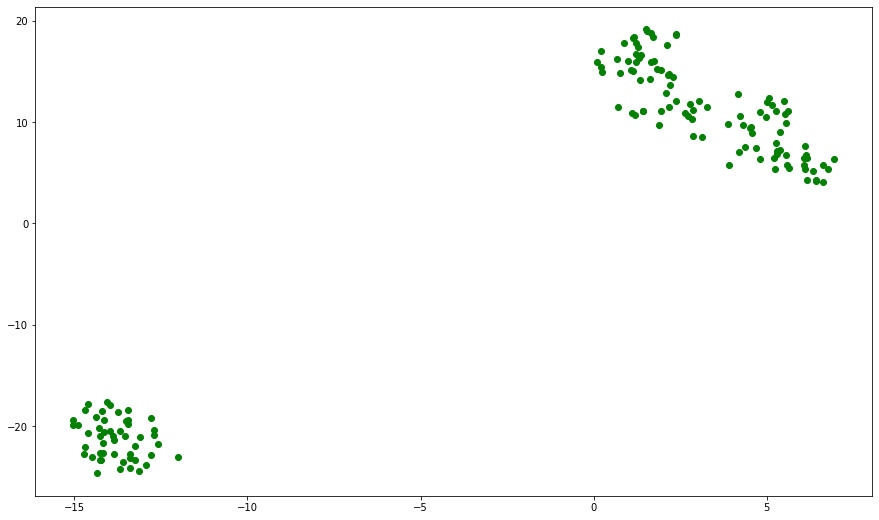

In [39]:
figure = plt.figure(figsize=(15, 9))
dots = plt.scatter(new_data[:, 0], new_data[:, 1], c='g')
plt.show()

**Q4.b: Create a Seaborn pairplot graph (like we showed for Iris) for the California
Housing dataset. Try the Matplotlib features for panning and zooming the
diagram. These are accessible via the icons in the Matplotlib window.** 

In [40]:
import seaborn as sns
%matplotlib inline
from sklearn.datasets import fetch_california_housing #this dataset has no 'hue' value and time of ploting is so long.
                                                      #So i find new dataset to apply 'hue' with ocean_proximity.
sns.set_style('whitegrid')

In [41]:
data = pd.read_csv('housing.csv') #New dataset but same logic was applied in this problem.


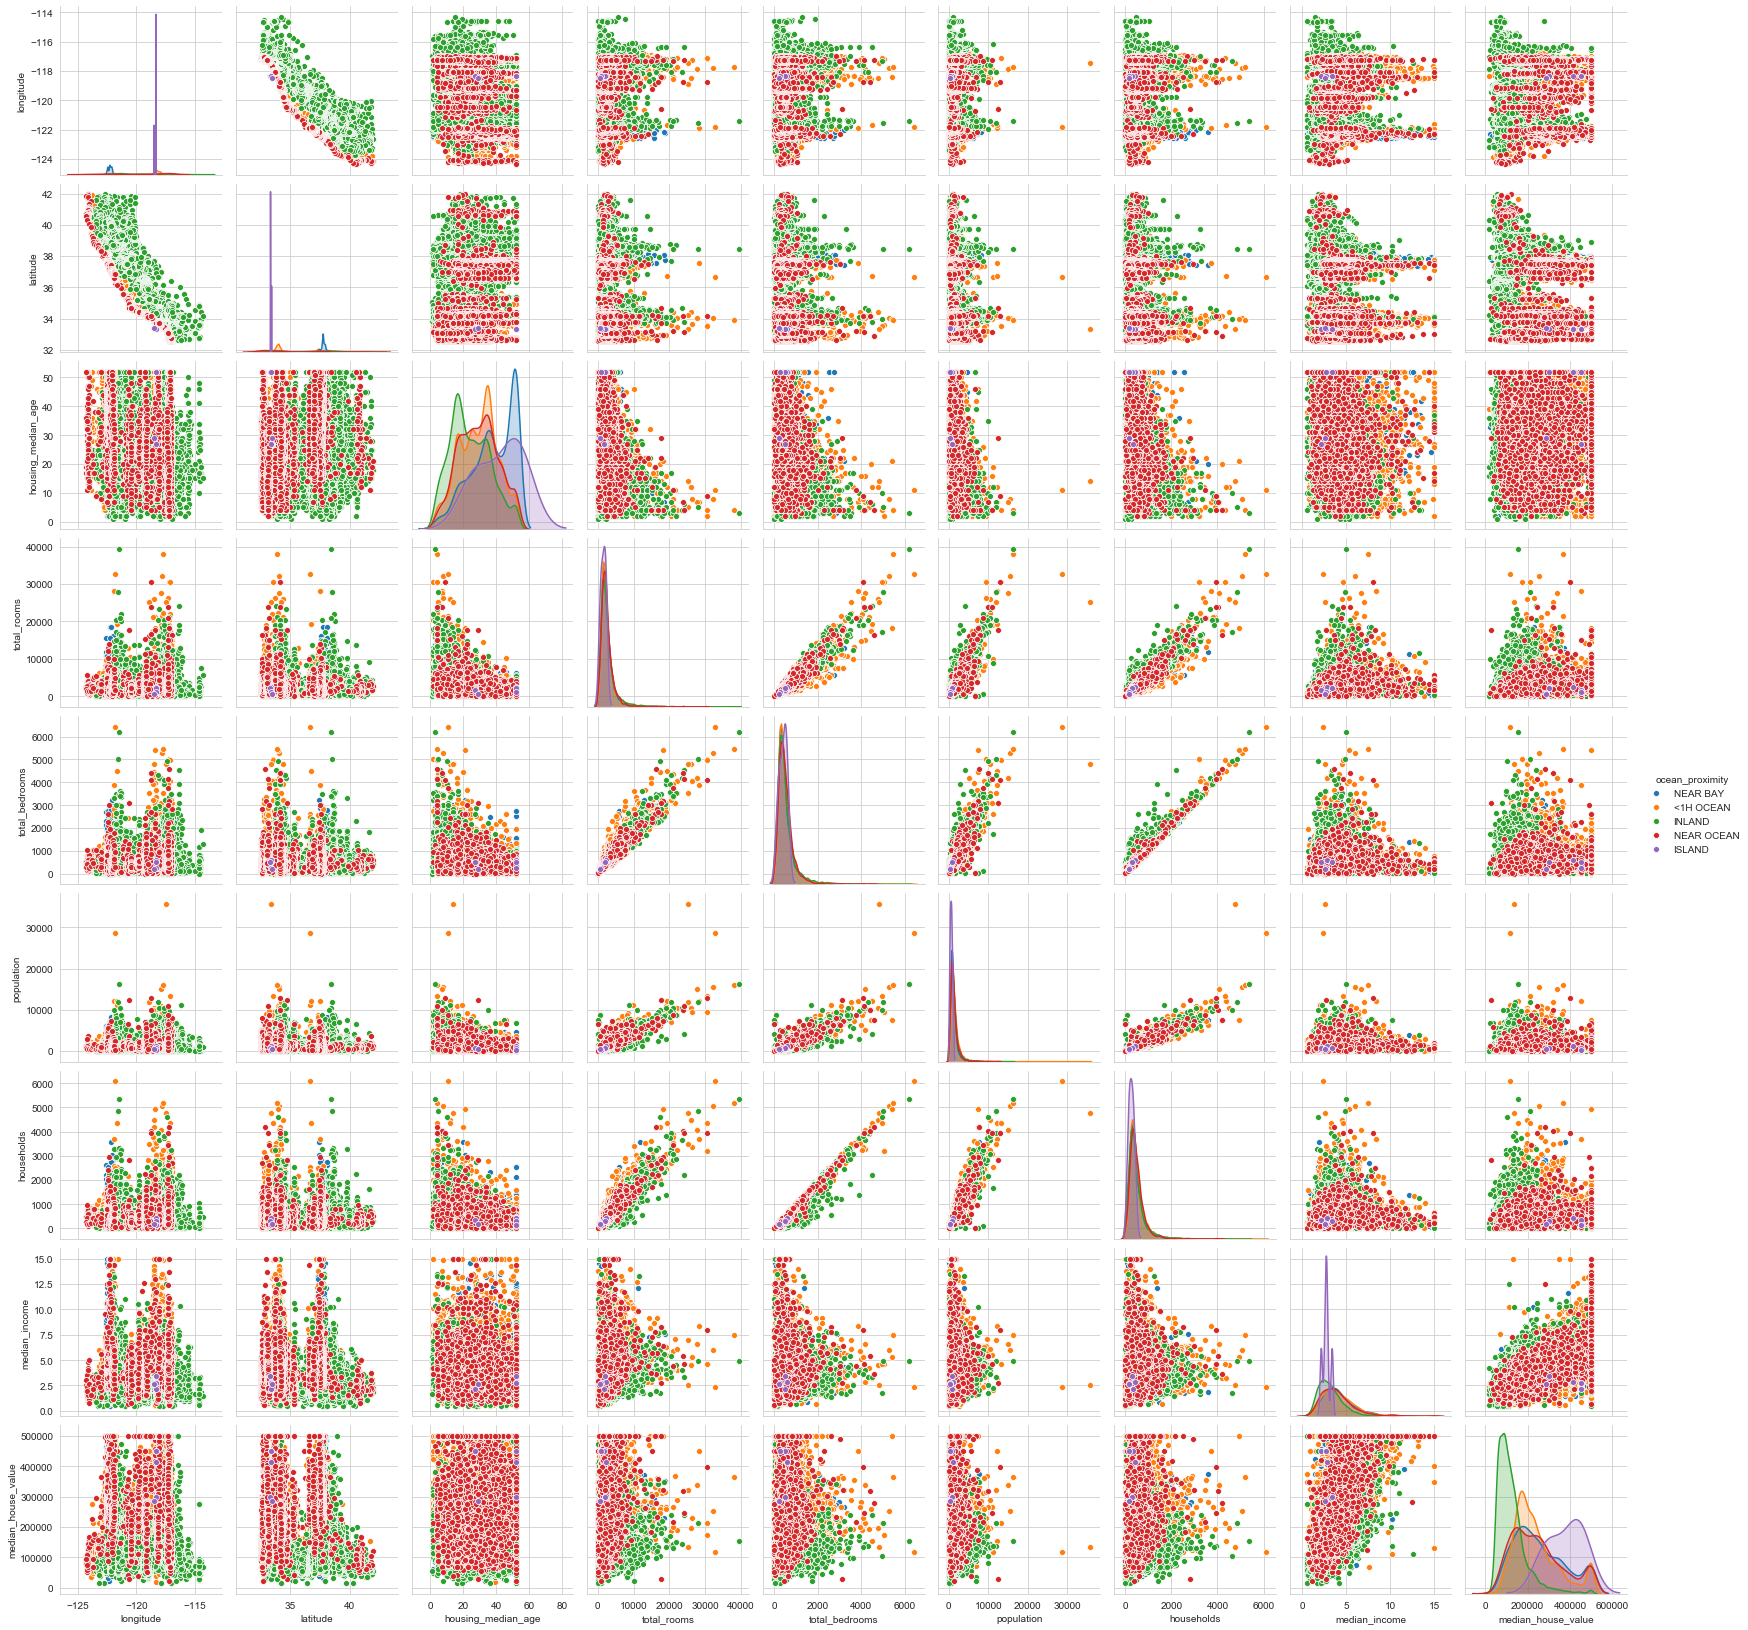

In [42]:
grid = sns.pairplot(data=data, vars=data.columns[:-1], hue='ocean_proximity')
plt.show()

**Q4.c: We used unsupervised learning with the Iris dataset to cluster its samples. This
dataset is in fact labeled so it can be used with scikit-learn’s supervised
machine learning estimators. Use the techniques you learned in the Digits
dataset classification case study to load the Iris dataset and perform
classification on it with the k-nearest neighbors algorithm. Use
a KNeighborsClassifier with the default k value. What is the prediction
accuracy?**

In [43]:
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=11)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [47]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
predicted = knn.predict(X=X_test)
expected = y_test

In [49]:
print("Prediction Accuracy:",f'{knn.score(X_test, y_test):.2%}')

Prediction Accuracy: 97.37%


**Q4.d: The dataset contains 442 samples, each with 10 features and a label indicating
the “disease progression one year after baseline.” Using this dataset,
reimplement the steps of this chapter’s multiple linear regression case study
in Section 15.5.**

In [50]:
from sklearn.datasets import load_diabetes

In [51]:
diabetes1 = load_diabetes()

In [52]:
diabetes_df = pd.DataFrame(diabetes1.data, columns= diabetes1.feature_names)

In [53]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)


In [54]:
import seaborn as sns
sns.set_style('whitegrid')

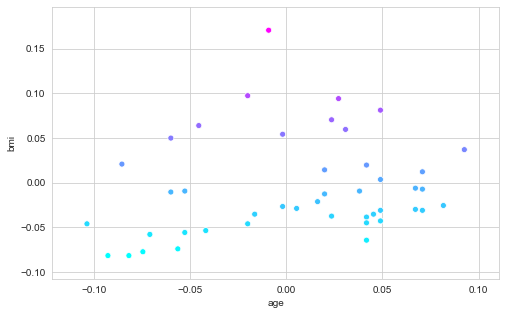

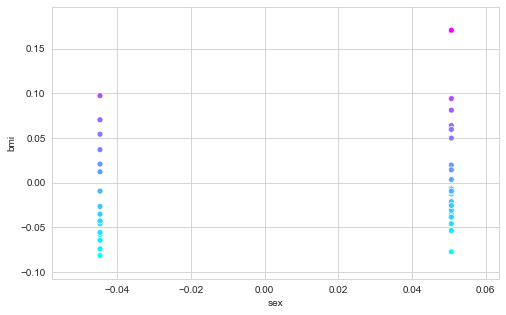

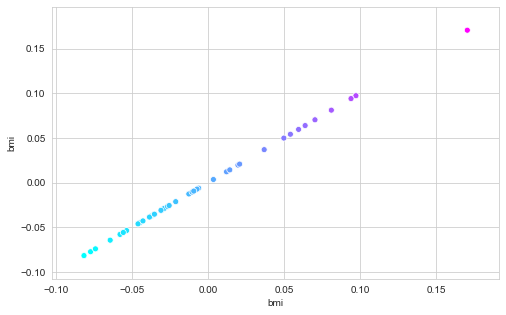

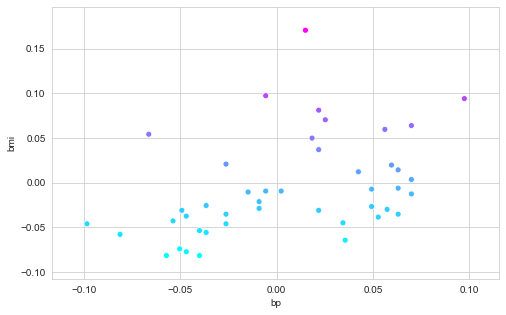

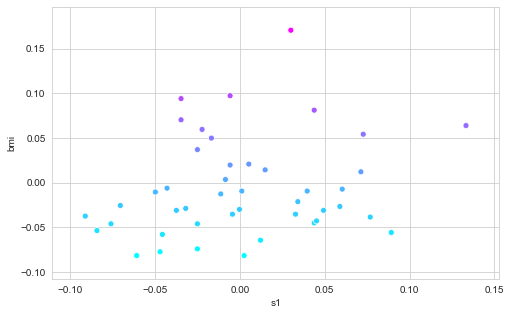

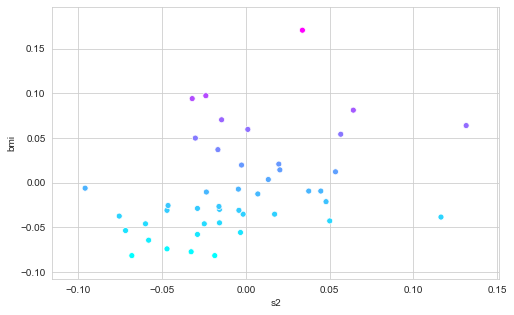

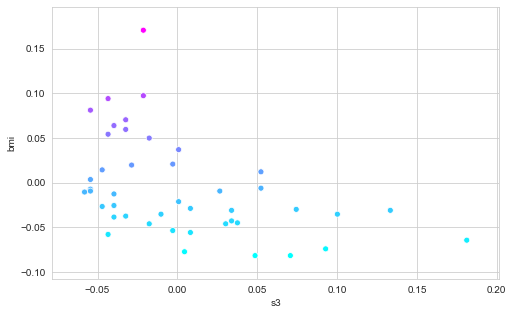

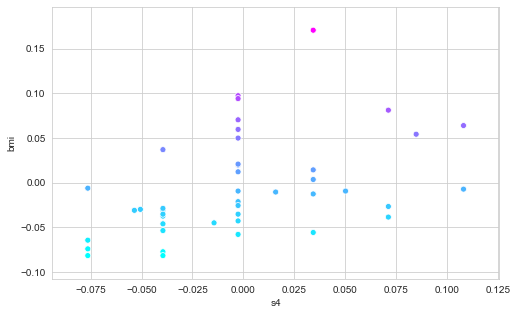

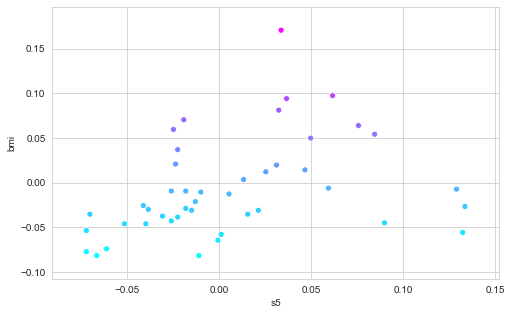

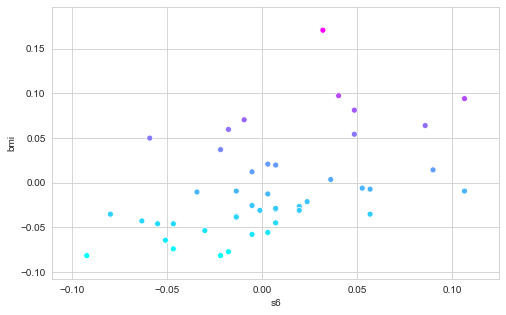

In [55]:
for feature in diabetes1.feature_names:
    plt.figure(figsize=(8, 5))  
    sns.scatterplot(data=sample_df, x=feature, 
                    y='bmi', hue='bmi', 
                    palette='cool', legend=False)
    plt.show()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes1.data, diabetes1.target, random_state=11)


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
for i, name in enumerate(diabetes1.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')  

In [ ]:
predict = linear_regression.predict(X_test)

In [ ]:
expect = y_test

In [ ]:
plot_df = pd.DataFrame()
plot_df['Predicted'] = predict
plot_df['Expected'] = expect

In [ ]:
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=plot_df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

axes.set_xlim(min(expect.min(), predict.min()), max(expect.max(), predict.max()))
axes.set_ylim(min(expect.min(), predict.min()), max(expect.max(), predict.max()))

line = plt.plot([min(expect.min(), predict.min()), max(expect.max(), predict.max())], [min(expect.min(), predict.min()), max(expect.max(), predict.max())], 'k--')
plt.show()

In [ ]:
from sklearn import metrics
print("R2 score =",metrics.r2_score(expect, predict))

**Q4.e: The DecisionTreeClassifier builds a decision
tree internally which you can output in the DOT graphing language with
the export_graphviz function (module sklearn.tree). You can use
the open source Graphviz visualization software to create a decision-tree
graphic from the DOT file.**

In [ ]:
titanic = pd.read_csv('TitanicSurvival.csv') # I find this data from github. It includes nice columns for applying Decision Tree
titanic['age'] = titanic.age.fillna(titanic['age'].dropna().mean()) #Filling NA values with average age.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#Some strings converted to numbers.

titanic['sex'].replace('female',1,inplace=True)
titanic['sex'].replace('male',0,inplace=True)
titanic['survived'].replace('yes',1,inplace=True)
titanic['survived'].replace('no',0,inplace=True)
titanic['passengerClass'].replace('1st',1,inplace=True)
titanic['passengerClass'].replace('2nd',2,inplace=True)
titanic['passengerClass'].replace('3rd',3,inplace=True)

In [ ]:
X = titanic.iloc[:,2:]
y = titanic.survived

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [ ]:
feature_cols = ['sex','age','passengerClass']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())


# Question 6

**Q6.a: Select all authors’ last names from the authors table in descending order.**

In [ ]:
!sqlite3 books.db < ./books.sql


In [ ]:
import sqlite3
import pandas as pd

In [ ]:
connection = sqlite3.connect('books.db')

In [ ]:
print(pd.read_sql('Select last from authors order by last DESC',connection))

**Q6.b: Select all book titles from the titles table in ascending order.**

In [ ]:
print(pd.read_sql('Select title from titles order by title ASC',connection))

**Q6.c: Use an INNER JOIN to select all the books for a specific author. Include the
title, copyright year and ISBN. Order the information alphabetically by title.**

In [ ]:
print(pd.read_sql("""Select first,last,title,copyright,author_ISBN.isbn from 
titles inner join author_ISBN on author_ISBN.isbn = titles.isbn 
inner join authors on authors.id = author_ISBN.id order by title ASC""",connection))

**Q6.d: Insert a new author into the authors table.** 

In [ ]:
cursor = connection.cursor()


In [ ]:
cursor = cursor.execute("Insert into authors (first, last) values ('Lzzyy', 'Hale')")

In [ ]:
print(pd.read_sql("Select * from authors",connection))